In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
X = df['LotArea'].values
y = df['SalePrice'].values

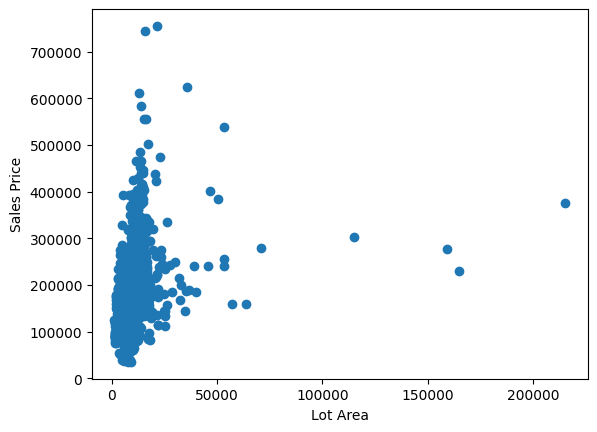

In [27]:
plt.scatter(X, y)
plt.xlabel('Lot Area')
plt.ylabel('Sales Price')
plt.show()

In [32]:
X = X.reshape(-1, 1)
X.shape

(1460, 1)

In [33]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)

In [34]:
reg = LinearRegression()

In [35]:
cv_scores = cross_val_score(reg, X, y, cv=kf)
cv_scores

array([ 0.06089564,  0.07068419,  0.0325173 ,  0.08930736, -0.11762295,
        0.09767718])

In [36]:
print(np.mean(cv_scores), np.std(cv_scores), np.quantile(cv_scores, [0.025, 0.975]))

0.038909786534715586 0.07306375664335375 [-0.09885542  0.09663095]


In [37]:
reg.fit(X, y)

LinearRegression()

In [38]:
predictions = reg.predict(X)

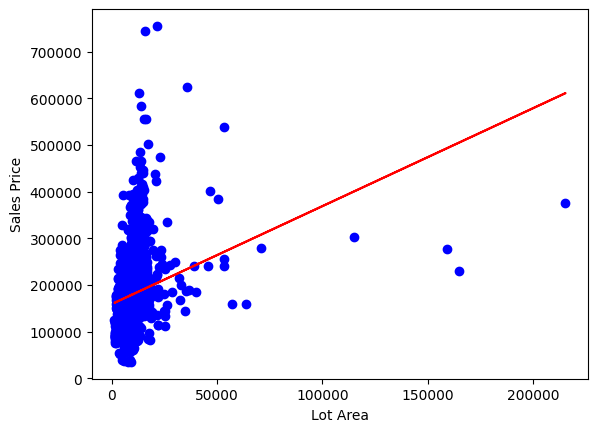

In [39]:
plt.scatter(X, y, color='blue')
plt.plot(X, predictions, color='red')
plt.xlabel('Lot Area')
plt.ylabel('Sales Price')
plt.show()

In [52]:
X = df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF']].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
lin_reg = LinearRegression()

In [44]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = lin_reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [182433.91071866 265699.45926389], Actual Values: [154500 325000]


In [46]:
r_squared = lin_reg.score(X_test, y_test)
r_squared

0.7250804473882331

In [47]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

45920.83023276252

In [48]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)
    
ridge_scores

[0.7250785254631689,
 0.725061153559422,
 0.7248801821759719,
 0.7224605934459576,
 0.683986204588008,
 0.5761563842136803]

In [53]:
lasso = Lasso(alpha=0.3)
lasso.fit(X, y)

Lasso(alpha=0.3)

In [54]:
lasso_coef = lasso.coef_
lasso_coef

array([1.12894273e+00, 3.42883634e+04, 4.19766955e+03, 3.02492263e+02,
       3.99467398e+01])

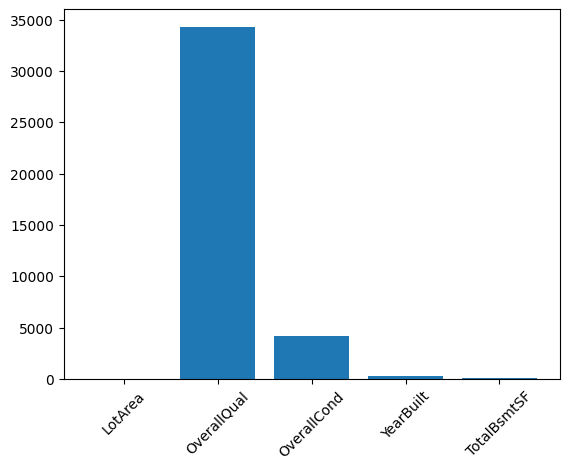

In [55]:
X_names = df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF']].columns

plt.bar(X_names, lasso_coef)
plt.xticks(rotation=45)
plt.show()